## 線形回帰
- 実際のデータを使って線形回帰を行う

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画

### 1. データの読み込み 

In [2]:
df_house = pd.read_csv("../1_data/kc_house_data.csv")[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']]

# 先程と似た中古住宅のデータ
display(df_house.head())
df_house.describe()

,price,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900.0,1180,5650,1180,1955,1340,5650
1,538000.0,2570,7242,2170,1951,1690,7639
2,180000.0,770,10000,770,1933,2720,8062
3,604000.0,1960,5000,1050,1965,1360,5000
4,510000.0,1680,8080,1680,1987,1800,7503


,price,sqft_living,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,1.510697e+04,1788.390691,1971.005136,1986.552492,12768.455652
std,3.671272e+05,918.440897,4.142051e+04,828.090978,29.373411,685.391304,27304.179631
min,7.500000e+04,290.000000,5.200000e+02,290.000000,1900.000000,399.000000,651.000000
25%,3.219500e+05,1427.000000,5.040000e+03,1190.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,1910.000000,7.618000e+03,1560.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,2550.000000,1.068800e+04,2210.000000,1997.000000,2360.000000,10083.000000
max,7.700000e+06,13540.000000,1.651359e+06,9410.000000,2015.000000,6210.000000,871200.000000


### 2. [演習] データの統計量を確認し，Scikit-learnを用いて線形回帰を実装してみましょう
- 先程は説明変数を選択しましたが，この演習ではすべての説明変数を使用しましょう
- 散布図行列を書いてみましょう
- 相関係数を確認してみましょう
- 相関係数をヒートマップで可視化してみましょう
- w0, w1, ..., w6と二乗誤差を表示してみましょう

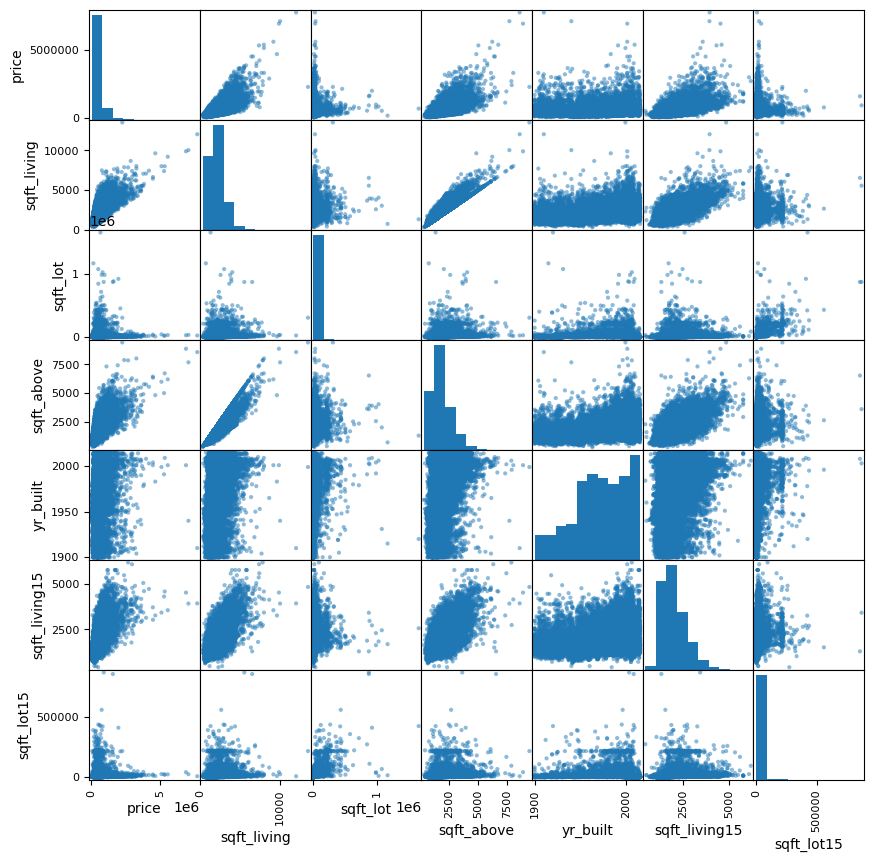

In [5]:
pd.plotting.scatter_matrix(df_house,figsize=(10,10))
plt.show()

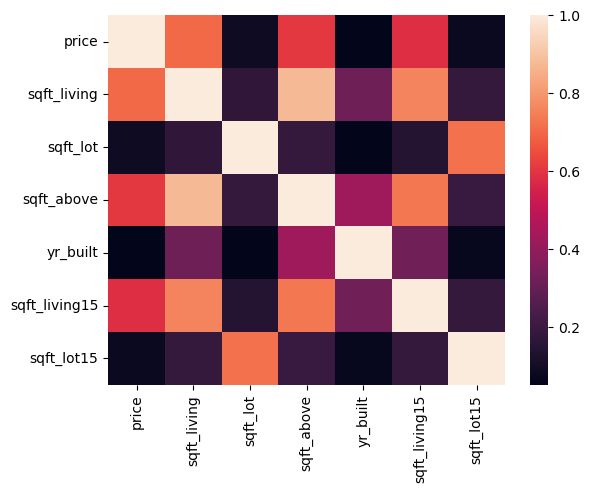

In [6]:
sns.heatmap(df_house.corr())
plt.show()

In [9]:
y = df_house["price"].values
X = df_house[['sqft_living','sqft_lot','sqft_above','yr_built','sqft_living15','sqft_lot15']]

regr = LinearRegression(fit_intercept=True)
regr.fit(X,y)

w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]
w4 = regr.coef_[3]
w5 = regr.coef_[4]
w6 = regr.coef_[5]

In [11]:
x1 = df_house['sqft_living'].values
x2 = df_house['sqft_lot'].values
x3 = df_house['sqft_above'].values
x4 = df_house['yr_built'].values
x5 = df_house['sqft_living15'].values
x6 = df_house['sqft_lot15'].values

y_est = w0 + x1 * w1 + x2 * w2 + x3 * w3 + x4 * w4 + x5 * w5 + x6 * w6
squared_error = 0.5 * np.sum((y-y_est)**2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}, w6 = {:.3f}, 二乗誤差 = {:.3f}'.format(w0, w1, w2, w3, w4, w5, w6, squared_error))


w0 = 5028516.266, w1 = 244.020, w2 = 0.027, w3 = 21.221, w4 = -2639.639, w5 = 89.670, w6 = -0.761, 二乗誤差 = 670336500985470.125


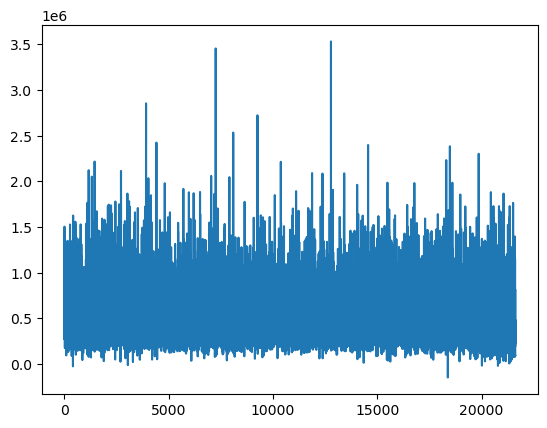